In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
print("Block executed")

Block executed


In [2]:
df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df = df.drop(columns = ["PassengerId","Name","Cabin"])

In [5]:
df.shape

(8693, 11)

In [6]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

<Axes: >

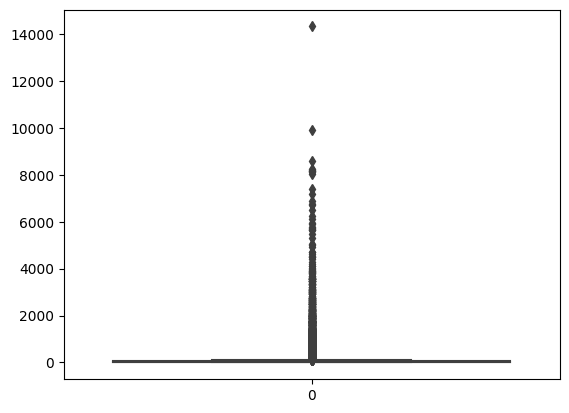

In [7]:
#cleaning ouliers
sns.boxplot(df["RoomService"])

In [8]:
q1 = df['RoomService'].quantile(0.25)
q3 = df['RoomService'].quantile(0.75)
iqr = q3 - q1
uw = q3 + iqr * 1.5
lw = q1 - iqr * 1.5
df.loc[df['RoomService'] < lw, "RoomService"] = lw 
df.loc[df['RoomService'] > uw, "RoomService"] = uw
print("Block executed")

Block executed


<Axes: >

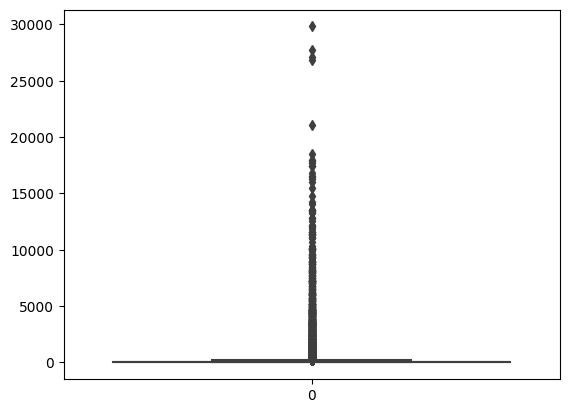

In [9]:
sns.boxplot(df["FoodCourt"])

In [10]:
q1 = df['FoodCourt'].quantile(0.25)
q3 = df['FoodCourt'].quantile(0.75)
iqr = q3 - q1
uw = q3 + iqr * 1.5
lw = q1 - iqr * 1.5
df.loc[df['FoodCourt'] < lw, "FoodCourt"] = lw 
df.loc[df['FoodCourt'] > uw, "FoodCourt"] = uw
print("Block executed")

Block executed


<Axes: >

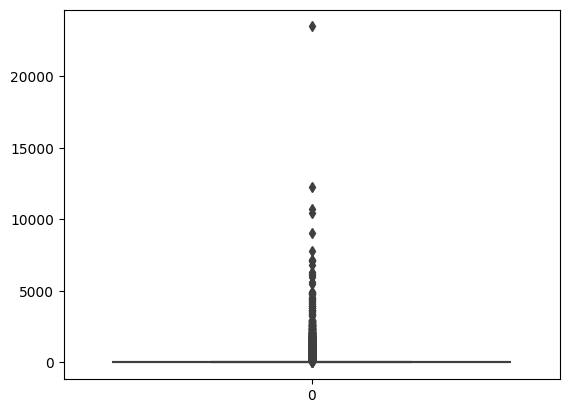

In [11]:
sns.boxplot(df["ShoppingMall"])

In [12]:
q1 = df['ShoppingMall'].quantile(0.25)
q3 = df['ShoppingMall'].quantile(0.75)
iqr = q3 - q1
uw = q3 + iqr * 1.5
lw = q1 - iqr * 1.5
df.loc[df['ShoppingMall'] < lw, "ShoppingMall"] = lw 
df.loc[df['ShoppingMall'] > uw, "ShoppingMall"] = uw
print("Block executed")

Block executed


<Axes: >

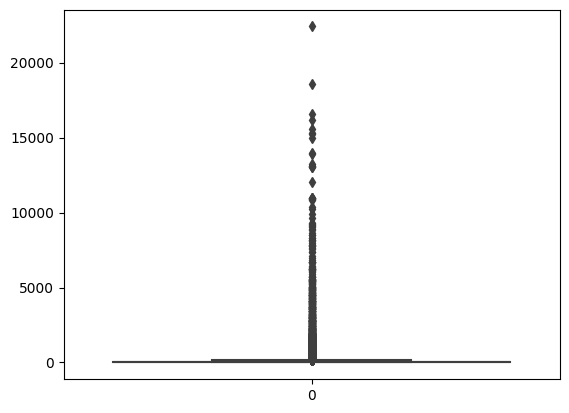

In [13]:
sns.boxplot(df["Spa"])

In [14]:
q1 = df['Spa'].quantile(0.25)
q3 = df['Spa'].quantile(0.75)
iqr = q3 - q1
uw = q3 + iqr * 1.5
lw = q1 - iqr * 1.5
df.loc[df['Spa'] < lw, "Spa"] = lw 
df.loc[df['Spa'] > uw, "Spa"] = uw
print("Block executed")

Block executed


<Axes: >

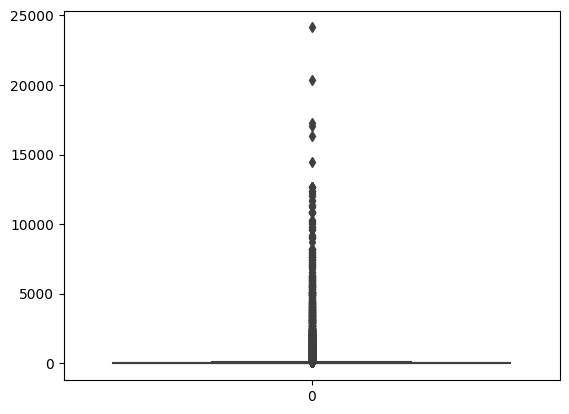

In [15]:
sns.boxplot(df["VRDeck"])

In [16]:
q1 = df['VRDeck'].quantile(0.25)
q3 = df['VRDeck'].quantile(0.75)
iqr = q3 - q1
uw = q3 + iqr * 1.5
lw = q1 - iqr * 1.5
df.loc[df['VRDeck'] < lw, "VRDeck"] = lw 
df.loc[df['VRDeck'] > uw, "VRDeck"] = uw
print("Block executed")

Block executed


In [17]:
import warnings
warnings.filterwarnings('ignore')
print("Block executed")

Block executed


In [18]:
#filling NaN
df["Age"].fillna(df["Age"].median(), inplace = True)   
df["RoomService"].fillna(df["RoomService"].median(), inplace = True)
df["FoodCourt"].fillna(df["FoodCourt"].median(), inplace = True)
df["ShoppingMall"].fillna(df["ShoppingMall"].median(), inplace = True)
df["Spa"].fillna(df["Spa"].median(), inplace = True)
df["VRDeck"].fillna(df["VRDeck"].median(), inplace = True)
print("Block executed")

Block executed


In [19]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

enc = OneHotEncoder(categories = 'auto',
                    drop = 'if_binary',
                    sparse_output=False,
                    dtype = 'int64',
                    handle_unknown = 'infrequent_if_exist',
                    min_frequency = None,
                    max_categories = None).set_output(transform="pandas")
scaler = StandardScaler().set_output(transform="pandas")
cat_cols = df[['HomePlanet', 'CryoSleep','Destination','VIP']]
num_cols = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
df_enc = enc.fit_transform(cat_cols)
df_sca = scaler.fit_transform(num_cols)
df_pro = pd.concat([df_enc , df_sca.set_axis(df_enc.index)] , axis = 1)
df_pro.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,CryoSleep_False,CryoSleep_True,CryoSleep_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_False,VIP_True,VIP_nan,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,-0.593995,-0.592725,-0.591986,-0.600535,-0.594079
1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1.650211,-0.477613,0.309873,1.844078,0.339229
2,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0.291334,1.837432,-0.591986,1.844078,0.445286
3,0,1,0,0,1,0,0,0,0,1,0,1,0,0,-0.593995,1.837432,1.843034,1.844078,1.845248
4,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1.825218,0.302596,1.843034,1.844078,-0.551656


In [20]:
X = df_pro[df_pro.columns]
y = df['Transported']
print("Block executed")

Block executed


In [21]:
#synthetic oversampling
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=1 ,
              k_neighbors = 93,
              n_jobs = -1)
X_res, y_res = sm.fit_resample(X, y)
print("Block executed")

Block executed


In [22]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [23]:
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False,random_state=1).fit(X_res, y_res)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.fit_transform(X_res)
print(model.get_support())
list1 = model.get_support()
pd.DataFrame(X_new)

[ True  True False False  True  True False False False False False False
 False False  True False False  True  True]


,0,1,2,3,4,5,6
0,0.0,1.0,1.0,0.0,-0.593995,-0.600535,-0.594079
1,1.0,0.0,1.0,0.0,1.650211,1.844078,0.339229
2,0.0,1.0,1.0,0.0,0.291334,1.844078,0.445286
3,0.0,1.0,1.0,0.0,-0.593995,1.844078,1.845248
4,1.0,0.0,1.0,0.0,1.825218,1.844078,-0.551656
...,...,...,...,...,...,...,...
8751,1.0,0.0,0.0,1.0,-0.593995,-0.600535,-0.594079
8752,1.0,0.0,0.0,1.0,-0.593995,-0.600535,-0.594079
8753,1.0,0.0,1.0,0.0,1.825218,1.844078,-0.456572
8754,1.0,0.0,0.0,1.0,-0.593995,-0.600535,-0.594079


In [24]:
pd.DataFrame(X_new).head()

,0,1,2,3,4,5,6
0,0.0,1.0,1.0,0.0,-0.593995,-0.600535,-0.594079
1,1.0,0.0,1.0,0.0,1.650211,1.844078,0.339229
2,0.0,1.0,1.0,0.0,0.291334,1.844078,0.445286
3,0.0,1.0,1.0,0.0,-0.593995,1.844078,1.845248
4,1.0,0.0,1.0,0.0,1.825218,1.844078,-0.551656


In [25]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
train_X, test_X, train_y, test_y = train_test_split(X_new, y_res, test_size = 0.2 )
print("Block executed")

Block executed


In [26]:
n_estimators = [50,200,500,1000]
max_depth = [1,20,35,50,100]
learning_rate = [0.1,0.01,0.001]
reg_alpha = [1,2,4]
reg_lambda = [1,3,5]
colsample_bytree = [0.5,0.8,1]
min_child_weight = [0,1,5,7,10]
gamma = [1,5,10,12,14]
eval_metric = ['auc','mae','rmse']

In [27]:
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'learning_rate':learning_rate,
               'reg_alpha':reg_alpha,
               'reg_lambda':reg_lambda,
               'colsample_bytree':colsample_bytree,
               'min_child_weight':min_child_weight,
               'gamma':gamma,
               'eval_metric':eval_metric
}

In [28]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn import svm
ship_model = RandomizedSearchCV(estimator = XGBClassifier(),
                                param_distributions = random_grid,
                                n_iter = 300,
                                cv = 3, 
                                verbose=1,
                                random_state=1,
                                n_jobs = -1)

In [29]:
ship_model.fit(train_X, train_y, verbose=False)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.8, 1],
                                        'eval_metric': ['auc', 'mae', 'rmse'],
                                        'gamma': [1, 5, 10, 12, 14],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [1, 20, 35, 50, 100],
                                        'min_child_weight': [0, 1, 5, 7, 10],
                                        'n_estimators': [50, 200, 500, 1000],
                                        'reg_alpha': [1, 2, 4],
                                        'reg_lambda': [1, 3, 5]},
                   random_state=1, verbose=1)

In [30]:
scores = cross_val_score(ship_model, X_res, y_res, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Fitting 3 folds for each of 300 candidates, totalling 900 fits
Fitting 3 folds for each of 300 candidates, totalling 900 fits
Fitting 3 folds for each of 300 candidates, totalling 900 fits
Fitting 3 folds for each of 300 candidates, totalling 900 fits
Fitting 3 folds for each of 300 candidates, totalling 900 fits
0.77 accuracy with a standard deviation of 0.01


In [31]:
predictions = ship_model.predict(test_X)
print(predictions)

[1 1 0 ... 1 0 0]


In [32]:
from sklearn.metrics import roc_auc_score
print("ROC_auc_score score of model", roc_auc_score(test_y,predictions))

ROC_auc_score score of model 0.7600460065697592


In [33]:
df_test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [34]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [35]:
df_test = df_test.drop(columns = ["PassengerId","Name","Cabin"])
print("Block executed")

Block executed


In [36]:
df_test["Age"].fillna(df_test["Age"].median(), inplace = True)   
df_test["RoomService"].fillna(df_test["RoomService"].median(), inplace = True)
df_test["FoodCourt"].fillna(df_test["FoodCourt"].median(), inplace = True)
df_test["ShoppingMall"].fillna(df_test["ShoppingMall"].median(), inplace = True)
df_test["Spa"].fillna(df_test["Spa"].median(), inplace = True)
df_test["VRDeck"].fillna(df_test["VRDeck"].median(), inplace = True)
print("Block executed")

Block executed


In [37]:
cat_cols_test = df_test[['HomePlanet', 'CryoSleep','Destination','VIP']]
num_cols_test = df_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
df_test_enc = enc.fit_transform(cat_cols_test)
df_pro_test = pd.concat([df_test_enc , num_cols_test.set_axis(df_test_enc.index)], axis = 1)
df_pro_test.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,CryoSleep_False,CryoSleep_True,CryoSleep_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_False,VIP_True,VIP_nan,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0.0,9.0,0.0,2823.0,0.0
2,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0.0,6652.0,0.0,181.0,585.0
4,1,0,0,0,1,0,0,0,0,1,0,1,0,0,10.0,0.0,635.0,0.0,0.0


In [38]:
df_pro_test.isnull().sum()

HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
HomePlanet_nan               0
CryoSleep_False              0
CryoSleep_True               0
CryoSleep_nan                0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Destination_nan              0
VIP_False                    0
VIP_True                     0
VIP_nan                      0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
dtype: int64

In [39]:
print(list1)

[ True  True False False  True  True False False False False False False
 False False  True False False  True  True]


In [40]:
i = 0
list_positions = []
while i<len(list1):
    if list1[i] == False:
        list_positions.append(i)
    i+=1
print(list_positions)

[2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16]


In [41]:
df_pro_test.drop(df_pro_test.columns[list_positions], axis=1, inplace =True)

In [42]:
df_pro_test.head()

,HomePlanet_Earth,HomePlanet_Europa,CryoSleep_False,CryoSleep_True,RoomService,Spa,VRDeck
0,1,0,0,1,0.0,0.0,0.0
1,1,0,1,0,0.0,2823.0,0.0
2,0,1,0,1,0.0,0.0,0.0
3,0,1,1,0,0.0,181.0,585.0
4,1,0,1,0,10.0,0.0,0.0


In [43]:
test_predictions = ship_model.predict(df_pro_test)
print(test_predictions)


[1 0 1 ... 1 0 1]


In [44]:
df_test2 = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [45]:
from array import array
test_prediction_bool = np.array(test_predictions,dtype='bool')
print(test_prediction_bool)

[ True False  True ...  True False  True]


In [46]:
output = pd.DataFrame({'PassengerId': df_test2.PassengerId,
                       'Transported': test_prediction_bool})

In [47]:
output.to_csv('space_titanic_submission10.csv', index=False)